In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [6]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

# N=8

In [7]:
# Exact S2 from ED
S2_SF_exact = 1.4313869097241088   # U/t=0.5
S2_PT_exact = 1.0487557642692404    # U/t=3.3
S2_MOTT_exact = 0.17456996234330271  # U/t=10.0

In [8]:
# U/t=0.5
data_SF = np.loadtxt('../ProcessedData/1D_8_8_4_0.500000_1.000000_betas_10000_S2.dat')
betas = data_SF[:,0]
S2_SF = data_SF[:,1]
S2_SF_err = data_SF[:,2]

# Calculate relative error between exact and estimate S2
S2_SF_relErr = np.abs((S2_SF-S2_SF_exact)/S2_SF_exact)
S2_SF_relErr_err = np.abs(S2_SF_err / S2_SF_exact)

# U/t=3.3
data_PT = np.loadtxt('../ProcessedData/1D_8_8_4_3.300000_1.000000_betas_10000_S2.dat')
betas = data_PT[:,0]
S2_PT = data_PT[:,1]
S2_PT_err = data_PT[:,2]

# Calculate relative error between exact and estimate S2
S2_PT_relErr = np.abs((S2_PT-S2_PT_exact)/S2_PT_exact)
S2_PT_relErr_err = np.abs(S2_PT_err / S2_PT_exact)

# U/t=10.0
data_MOTT = np.loadtxt('../ProcessedData/1D_8_8_4_10.000000_1.000000_betas_10000_S2.dat')
betas = data_MOTT[:,0]
S2_MOTT = data_MOTT[:,1]
S2_MOTT_err = data_MOTT[:,2]

# Calculate relative error between exact and estimate S2
S2_MOTT_relErr = np.abs((S2_MOTT-S2_MOTT_exact)/S2_MOTT_exact)
S2_MOTT_relErr_err = np.abs(S2_MOTT_err / S2_MOTT_exact)

MOTT exponent:   3.0040 +/- 0.0436
MOTT pre-factor: 9.7479 +/- 0.6640 

PT exponent:     1.5109 +/- 0.0060
PT pre-factor:   0.5015 +/- 0.0072 

SF exponent:     0.9493 +/- 0.0028
SF pre-factor:   0.2677 +/- 0.0017 



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


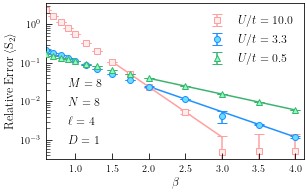

In [9]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax1 = plt.subplots()
    ax1.set_yscale("log")


    # U/t=10.0
    ax1.errorbar(betas,S2_MOTT_relErr, yerr=S2_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax1.errorbar(betas,S2_PT_relErr, yerr=S2_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax1.errorbar(betas,S2_SF_relErr, yerr=S2_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)
    
    # Perform single exponential fits
    def exponential(x, c1, c2):
        return c1*np.exp(-x*c2)
    

    # U/t=10.0
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[7:-2], 
                                                              S2_MOTT_relErr[7:-2],
                                                              sigma=S2_MOTT_relErr_err[7:-2],
                                                              p0=[1,1])
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    print("MOTT exponent:   %.4f +/- %.4f"%(c2,c2_err))
    print("MOTT pre-factor: %.4f +/- %.4f"%(c1,c1_err),"\n")
    betas_fit = np.linspace(betas[7],betas[-3],1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[0],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')
    
    # U/t=3.3
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              S2_PT_relErr[9:],
                                                              sigma=S2_PT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential)) 
    
    print("PT exponent:     %.4f +/- %.4f"%(c2,c2_err))
    print("PT pre-factor:   %.4f +/- %.4f"%(c1,c1_err),"\n")

    betas_fit = np.linspace(betas[9],4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[1],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')
    
    # U/t=0.5
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              S2_SF_relErr[9:],
                                                              sigma=S2_SF_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    print("SF exponent:     %.4f +/- %.4f"%(c2,c2_err))
    print("SF pre-factor:   %.4f +/- %.4f"%(c1,c1_err),"\n")

    betas_fit = np.linspace(betas[9],4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax1.plot(betas_fit,y_fit,color=colors[2],zorder=0)

    ax1.set_ylabel(r'$\rm{Relative} \; \rm{Error} \; \langle S_2 \rangle$')
    ax1.set_xlabel(r'$\beta$')
    ax1.axhline(0,color="#888888",zorder=-1)
    ax1.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax1.tick_params(direction='in')

    # Set plot limits
    ax1.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)

    # Annotate system information
    ax1.annotate(r"$M=8$",(0.22,0.60-.05),
                xycoords='figure fraction')
    ax1.annotate(r"$N=8$",(0.22,0.60-.15),
                xycoords='figure fraction')
    ax1.annotate(r"$\ell=4$",(0.22,0.60-.25),
                xycoords='figure fraction')
    ax1.annotate(r"$D=1$",(0.22,0.60-.35),
                xycoords='figure fraction')
    
    # Set tick parameters
    ax1.tick_params(direction='in',which='both')

    # Set legend
    plt.legend(frameon=False)

    # Save figure
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsS2_N8.pdf",dpi=400)
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsS2_N8.svg",dpi=400)
    plt.show()